In [60]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [61]:
# Load matches data

matches = pd.read_csv("../matches.csv")

print(f"Dataset shape: {matches.shape}")
print(f"\nFirst few rows:")
matches.head()

Dataset shape: (1389, 28)

First few rows:


,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
1,2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
2,3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
3,4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
4,6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [62]:
# Explore the dataset
print("Column names:")
print(matches.columns.tolist())
print("\n" + "="*60)
print("\nData types:")
print(matches.dtypes)
print("\n" + "="*60)
print("\nMissing values:")
print(matches.isnull().sum())
print("\n" + "="*60)
print("\nBasic statistics:")
matches.describe()

Column names:
['Unnamed: 0', 'date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga', 'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation', 'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'season', 'team']


Data types:
Unnamed: 0        int64
date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object


Missing values:
Unnamed: 0     

,Unnamed: 0,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,fk,pk,pkatt,season
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,693.000000,0.0,1389.000000,1389.000000,1388.000000,1389.000000,1389.000000,1389.000000,1389.000000
mean,22.771778,1.335493,1.380850,1.304176,1.338445,49.702664,36089.963925,NaN,12.153348,4.041037,17.011527,0.455724,0.119510,0.147588,2021.452844
std,13.668172,1.274235,1.291049,0.767268,0.789360,12.401897,17797.991778,NaN,5.268876,2.403866,2.988364,0.665389,0.352187,0.387804,0.497951
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,2000.000000,NaN,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2021.000000
25%,11.000000,0.000000,0.000000,0.700000,0.700000,40.000000,24351.000000,NaN,8.000000,2.000000,15.100000,0.000000,0.000000,0.000000,2021.000000
50%,22.000000,1.000000,1.000000,1.200000,1.200000,50.000000,32061.000000,NaN,12.000000,4.000000,16.900000,0.000000,0.000000,0.000000,2021.000000
75%,33.000000,2.000000,2.000000,1.800000,1.800000,59.000000,52214.000000,NaN,15.000000,5.000000,18.800000,1.000000,0.000000,0.000000,2022.000000
max,59.000000,9.000000,9.000000,4.600000,5.000000,82.000000,73458.000000,NaN,31.000000,15.000000,34.900000,4.000000,3.000000,3.000000,2022.000000


Match Results Distribution:
result
L    548
W    526
D    315
Name: count, dtype: int64

Win rate: 37.87%
Draw rate: 22.68%
Loss rate: 39.45%


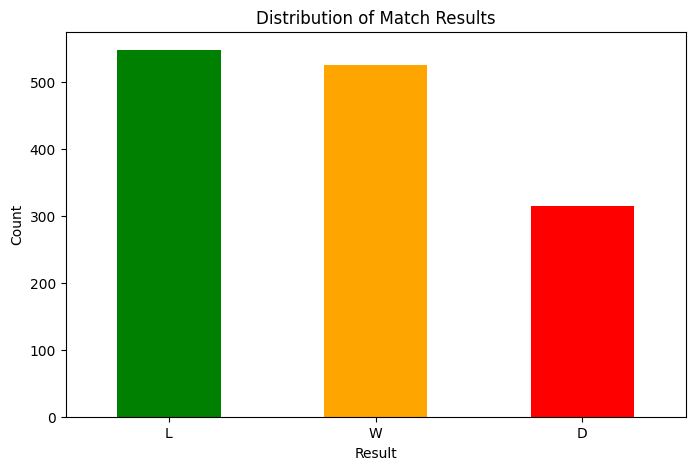

In [63]:
# Analyze the target variable (match results)
print("Match Results Distribution:")
print(matches['result'].value_counts())
print(f"\nWin rate: {(matches['result'] == 'W').sum() / len(matches) * 100:.2f}%")
print(f"Draw rate: {(matches['result'] == 'D').sum() / len(matches) * 100:.2f}%")
print(f"Loss rate: {(matches['result'] == 'L').sum() / len(matches) * 100:.2f}%")

# Visualize
plt.figure(figsize=(8, 5))
matches['result'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribution of Match Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [64]:
# Convert data types for machine learning
matches["date"] = pd.to_datetime(matches["date"])
matches["h/a"] = matches["venue"].astype("category").cat.codes  # Home (1) or Away (0)
matches["opp"] = matches["opponent"].astype("category").cat.codes  # Opponent ID
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")  # Hour of match
matches["day"] = matches["date"].dt.dayofweek  # Day of week (0=Monday, 6=Sunday)
matches["target"] = (matches["result"] == "W").astype("int")  # Win = 1, Not Win = 0

print("Preprocessing complete!")
print(f"\nNew columns created: h/a, opp, hour, day, target")
print(f"\nSample of processed data:")
matches[['date', 'venue', 'h/a', 'opponent', 'opp', 'time', 'hour', 'day', 'result', 'target']].head(10)

Preprocessing complete!

New columns created: h/a, opp, hour, day, target

Sample of processed data:


,date,venue,h/a,opponent,opp,time,hour,day,result,target
0,2021-08-15,Away,0,Tottenham,18,16:30,16,6,L,0
1,2021-08-21,Home,1,Norwich City,15,15:00,15,5,W,1
2,2021-08-28,Home,1,Arsenal,0,12:30,12,5,W,1
3,2021-09-11,Away,0,Leicester City,10,15:00,15,5,W,1
4,2021-09-18,Home,1,Southampton,17,15:00,15,5,D,0
5,2021-09-25,Away,0,Chelsea,5,12:30,12,5,W,1
6,2021-10-03,Away,0,Liverpool,11,16:30,16,6,D,0
7,2021-10-16,Home,1,Burnley,4,15:00,15,5,W,1
8,2021-10-23,Away,0,Brighton,3,17:30,17,5,W,1
9,2021-10-30,Home,1,Crystal Palace,6,15:00,15,5,L,0


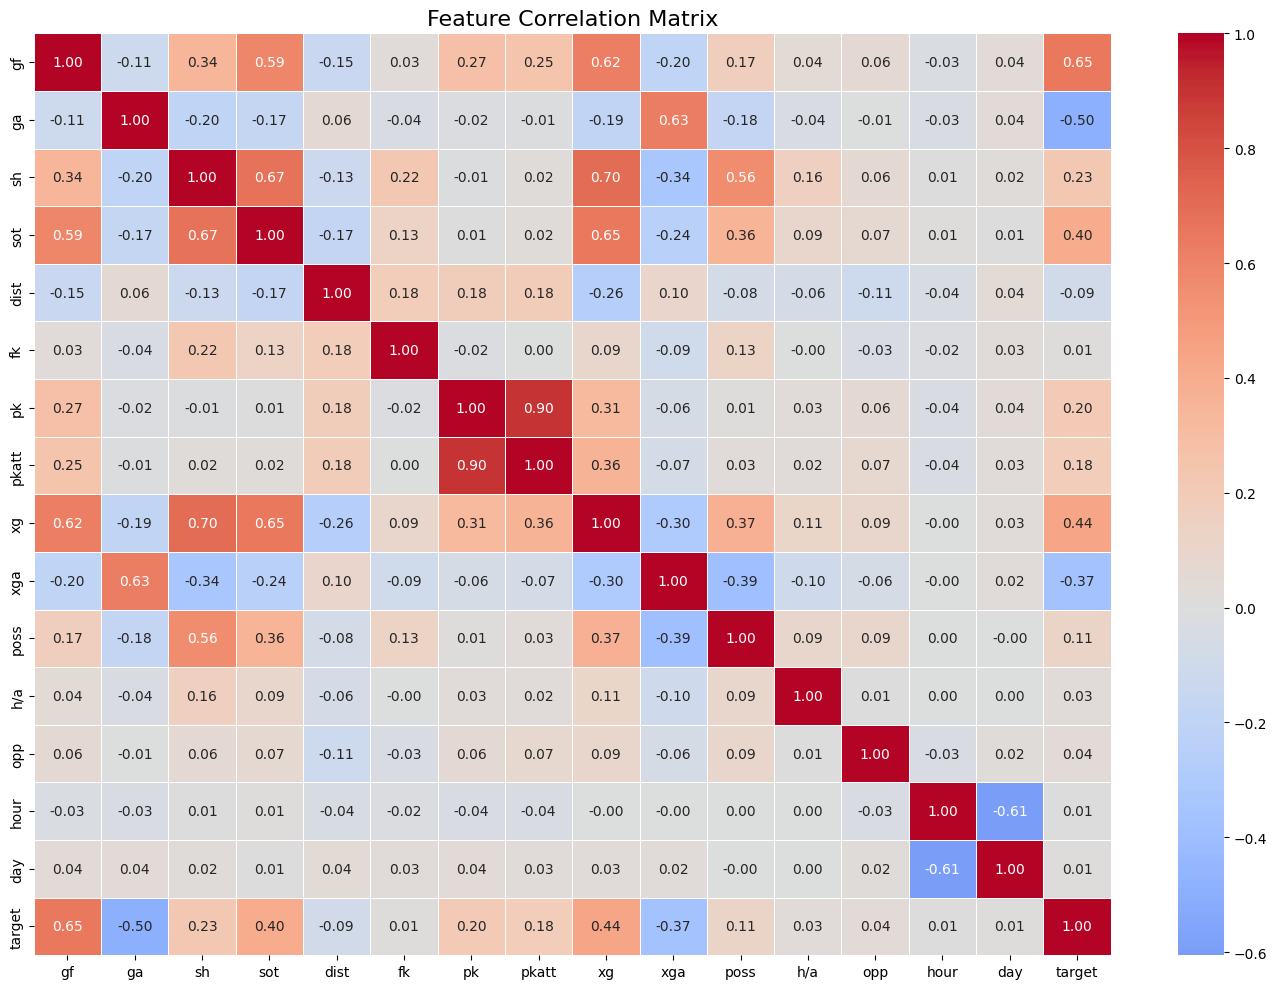


Correlations with Win/Loss (target):
target    1.000000
gf        0.651989
xg        0.439465
sot       0.403758
sh        0.227542
pk        0.204854
pkatt     0.179117
poss      0.112561
opp       0.039949
h/a       0.027857
fk        0.013654
day       0.013381
hour      0.009016
dist     -0.087727
xga      -0.372739
ga       -0.496336
Name: target, dtype: float64


In [65]:
# Select numerical columns for correlation
numerical_cols = ['gf', 'ga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 
                  'xg', 'xga', 'poss', 'h/a', 'opp', 'hour', 'day', 'target']

# Filter columns that exist
available_cols = [col for col in numerical_cols if col in matches.columns]
correlation_data = matches[available_cols].dropna()

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

# Show correlations with target variable
print("\nCorrelations with Win/Loss (target):")
target_correlations = correlation_matrix['target'].sort_values(ascending=False)
print(target_correlations)

In [66]:
# Function to calculate rolling averages (team form)
def rolling_averages(group, cols, new_cols):
    """Calculate rolling 3-match average for team statistics"""
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

# Define columns for rolling average
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

print(f"Rolling average columns to create: {new_cols}")

Rolling average columns to create: ['gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling', 'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling']


In [67]:
# Apply rolling averages grouped by team
grouped_matches = matches.groupby("team")
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling = matches_rolling.droplevel('team')
matches_rolling.index = range(matches_rolling.shape[0])

print(f"Dataset with rolling averages shape: {matches_rolling.shape}")
print(f"\nSample data with rolling features:")
matches_rolling[['team', 'date'] + cols + new_cols].head(10)

Dataset with rolling averages shape: (1317, 40)

Sample data with rolling features:


,team,date,gf,ga,sh,sot,dist,fk,pk,pkatt,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,Arsenal,2020-10-04,2.0,1.0,6.0,5.0,16.7,0.0,0.0,0.0,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
1,Arsenal,2020-10-17,0.0,1.0,11.0,3.0,18.2,2.0,0.0,0.0,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
2,Arsenal,2020-10-25,0.0,1.0,12.0,4.0,13.2,1.0,0.0,0.0,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
3,Arsenal,2020-11-01,1.0,0.0,6.0,1.0,22.7,0.0,1.0,1.0,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
4,Arsenal,2020-11-08,0.0,3.0,13.0,2.0,15.6,0.0,0.0,0.0,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
5,Arsenal,2020-11-22,0.0,0.0,9.0,2.0,18.5,2.0,0.0,0.0,0.333333,1.333333,10.333333,2.333333,17.166667,0.333333,0.333333,0.333333
6,Arsenal,2020-11-29,1.0,2.0,13.0,2.0,14.8,2.0,0.0,0.0,0.333333,1.000000,9.333333,1.666667,18.933333,0.666667,0.333333,0.333333
7,Arsenal,2020-12-06,0.0,2.0,12.0,2.0,15.1,1.0,0.0,0.0,0.333333,1.666667,11.666667,2.000000,16.300000,1.333333,0.000000,0.000000
8,Arsenal,2020-12-13,0.0,1.0,18.0,6.0,15.8,0.0,0.0,0.0,0.333333,1.333333,11.333333,2.000000,16.133333,1.666667,0.000000,0.000000
9,Arsenal,2020-12-16,1.0,1.0,9.0,4.0,21.1,0.0,0.0,0.0,0.333333,1.666667,14.333333,3.333333,15.233333,1.000000,0.000000,0.000000


In [68]:
# Split data by date
train = matches_rolling[matches_rolling["date"] < '2022-01-01']
test = matches_rolling[matches_rolling["date"] > '2022-01-01']

print(f"Training set: {train.shape[0]} matches (before 2022)")
print(f"Test set: {test.shape[0]} matches (after 2022)")
print(f"\nTraining date range: {train['date'].min()} to {train['date'].max()}")
print(f"Test date range: {test['date'].min()} to {test['date'].max()}")

# Define predictors
basic_predictors = ["h/a", "opp", "hour", "day"]
rolling_predictors = basic_predictors + new_cols

print(f"\nBasic predictors: {basic_predictors}")
print(f"Rolling predictors: {rolling_predictors}")

Training set: 1035 matches (before 2022)
Test set: 276 matches (after 2022)

Training date range: 2020-10-03 00:00:00 to 2021-12-30 00:00:00
Test date range: 2022-01-02 00:00:00 to 2022-04-25 00:00:00

Basic predictors: ['h/a', 'opp', 'hour', 'day']
Rolling predictors: ['h/a', 'opp', 'hour', 'day', 'gf_rolling', 'ga_rolling', 'sh_rolling', 'sot_rolling', 'dist_rolling', 'fk_rolling', 'pk_rolling', 'pkatt_rolling']


# Basic Random Forest

BASIC RANDOM FOREST (without rolling features)
Accuracy: 0.6014 (60.14%)
Precision: 0.4516 (45.16%)

Classification Report:
              precision    recall  f1-score   support

     Not Win       0.64      0.80      0.72       172
         Win       0.45      0.27      0.34       104

    accuracy                           0.60       276
   macro avg       0.55      0.54      0.53       276
weighted avg       0.57      0.60      0.57       276



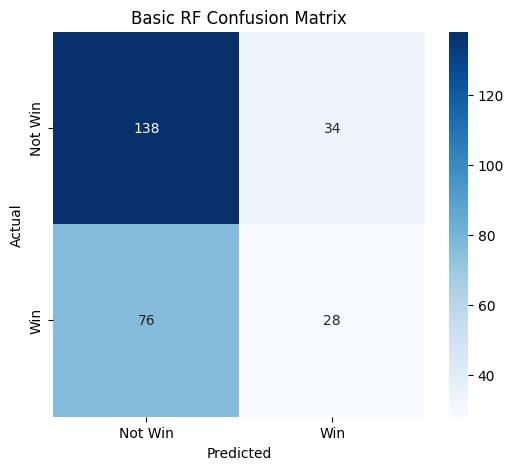

In [69]:

# Train Random Forest with basic features only
rf_basic = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)
rf_basic.fit(train[basic_predictors], train["target"])

# Predictions
preds_basic = rf_basic.predict(test[basic_predictors])

# Metrics
acc_basic = accuracy_score(test["target"], preds_basic)
prec_basic = precision_score(test["target"], preds_basic)

print("="*60)
print("BASIC RANDOM FOREST (without rolling features)")
print("="*60)
print(f"Accuracy: {acc_basic:.4f} ({acc_basic*100:.2f}%)")
print(f"Precision: {prec_basic:.4f} ({prec_basic*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(test["target"], preds_basic, target_names=['Not Win', 'Win']))

# Confusion Matrix
cm_basic = confusion_matrix(test["target"], preds_basic)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])
plt.title('Basic RF Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

RANDOM FOREST WITH ROLLING FEATURES
Accuracy: 0.6812 (68.12%)
Precision: 0.6739 (67.39%)

Classification Report:
              precision    recall  f1-score   support

     Not Win       0.68      0.91      0.78       172
         Win       0.67      0.30      0.41       104

    accuracy                           0.68       276
   macro avg       0.68      0.61      0.60       276
weighted avg       0.68      0.68      0.64       276



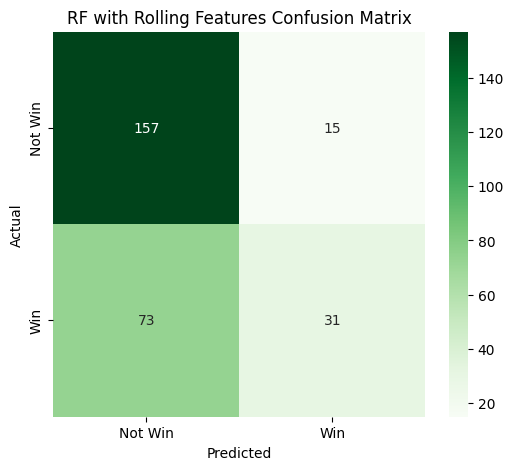

In [70]:
# Train Random Forest with rolling features
rf_rolling = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)
rf_rolling.fit(train[rolling_predictors], train["target"])

# Predictions
preds_rolling = rf_rolling.predict(test[rolling_predictors])

# Metrics
acc_rolling = accuracy_score(test["target"], preds_rolling)
prec_rolling = precision_score(test["target"], preds_rolling)

print("="*60)
print("RANDOM FOREST WITH ROLLING FEATURES")
print("="*60)
print(f"Accuracy: {acc_rolling:.4f} ({acc_rolling*100:.2f}%)")
print(f"Precision: {prec_rolling:.4f} ({prec_rolling*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(test["target"], preds_rolling, target_names=['Not Win', 'Win']))

# Confusion Matrix
cm_rolling = confusion_matrix(test["target"], preds_rolling)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rolling, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])
plt.title('RF with Rolling Features Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

LOGISTIC REGRESSION
Accuracy: 0.6159 (61.59%)
Precision: 0.4545 (45.45%)

Classification Report:
              precision    recall  f1-score   support

     Not Win       0.63      0.93      0.75       172
         Win       0.45      0.10      0.16       104

    accuracy                           0.62       276
   macro avg       0.54      0.51      0.45       276
weighted avg       0.56      0.62      0.53       276



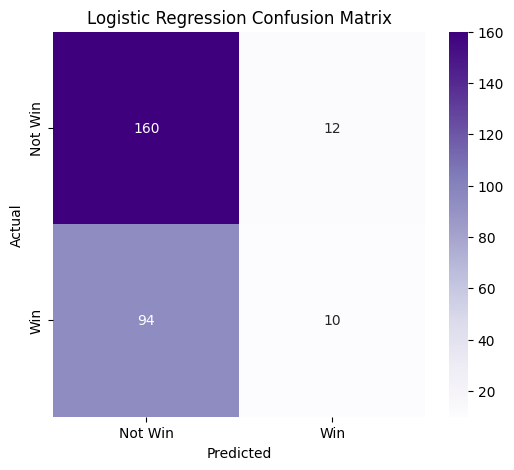

In [71]:
# Train Logistic Regression
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(train[rolling_predictors], train["target"])

# Predictions
preds_lr = lr.predict(test[rolling_predictors])

# Metrics
acc_lr = accuracy_score(test["target"], preds_lr)
prec_lr = precision_score(test["target"], preds_lr)

print("="*60)
print("LOGISTIC REGRESSION")
print("="*60)
print(f"Accuracy: {acc_lr:.4f} ({acc_lr*100:.2f}%)")
print(f"Precision: {prec_lr:.4f} ({prec_lr*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(test["target"], preds_lr, target_names=['Not Win', 'Win']))

# Confusion Matrix
cm_lr = confusion_matrix(test["target"], preds_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])
plt.title('Logistic Regression Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

SUPPORT VECTOR MACHINE (SVM)
Accuracy: 0.5688 (56.88%)
Precision: 0.4286 (42.86%)

Classification Report:
              precision    recall  f1-score   support

     Not Win       0.65      0.65      0.65       172
         Win       0.43      0.43      0.43       104

    accuracy                           0.57       276
   macro avg       0.54      0.54      0.54       276
weighted avg       0.57      0.57      0.57       276



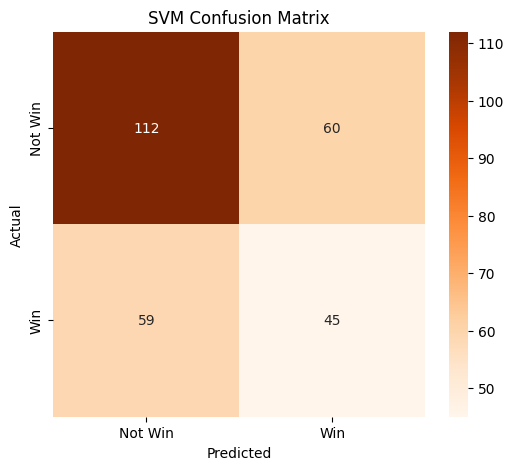

In [72]:
# Train SVM with class weight balancing
svm = SVC(
    kernel='rbf', 
    random_state=1,
    class_weight='balanced',  # ← This fixes the imbalance issue
    C=10,                     # Increase regularization
    gamma='auto'              # Alternative gamma setting
)
svm.fit(train[rolling_predictors], train["target"])

# Predictions
preds_svm = svm.predict(test[rolling_predictors])

# Metrics
acc_svm = accuracy_score(test["target"], preds_svm)
prec_svm = precision_score(test["target"], preds_svm, zero_division=0)

print("="*60)
print("SUPPORT VECTOR MACHINE (SVM)")
print("="*60)
print(f"Accuracy: {acc_svm:.4f} ({acc_svm*100:.2f}%)")
print(f"Precision: {prec_svm:.4f} ({prec_svm*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(test["target"], preds_svm, target_names=['Not Win', 'Win'], zero_division=0))

# Confusion Matrix
cm_svm = confusion_matrix(test["target"], preds_svm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])
plt.title('SVM Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

XGBOOST
Accuracy: 0.6413 (64.13%)
Precision: 0.5275 (52.75%)

Classification Report:
              precision    recall  f1-score   support

     Not Win       0.70      0.75      0.72       172
         Win       0.53      0.46      0.49       104

    accuracy                           0.64       276
   macro avg       0.61      0.61      0.61       276
weighted avg       0.63      0.64      0.64       276



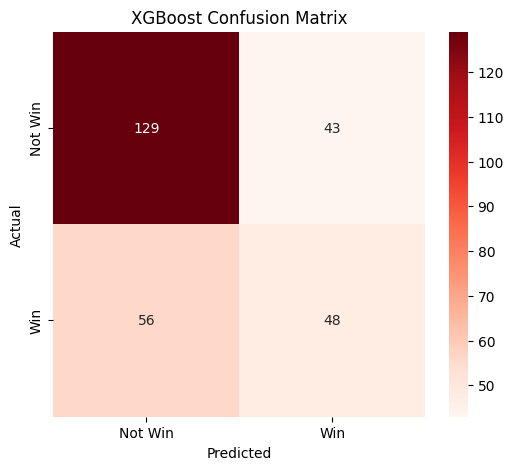

In [73]:
# Train XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=1, eval_metric='logloss')
xgb.fit(train[rolling_predictors], train["target"])

# Predictions
preds_xgb = xgb.predict(test[rolling_predictors])

# Metrics
acc_xgb = accuracy_score(test["target"], preds_xgb)
prec_xgb = precision_score(test["target"], preds_xgb)

print("="*60)
print("XGBOOST")
print("="*60)
print(f"Accuracy: {acc_xgb:.4f} ({acc_xgb*100:.2f}%)")
print(f"Precision: {prec_xgb:.4f} ({prec_xgb*100:.2f}%)")
print("\nClassification Report:")
print(classification_report(test["target"], preds_xgb, target_names=['Not Win', 'Win']))

# Confusion Matrix
cm_xgb = confusion_matrix(test["target"], preds_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Not Win', 'Win'], yticklabels=['Not Win', 'Win'])
plt.title('XGBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Compare the Models

MODEL COMPARISON
              Model  Accuracy  Precision
       RF + Rolling  0.681159   0.673913
            XGBoost  0.641304   0.527473
Logistic Regression  0.615942   0.454545
           Basic RF  0.601449   0.451613
                SVM  0.568841   0.428571


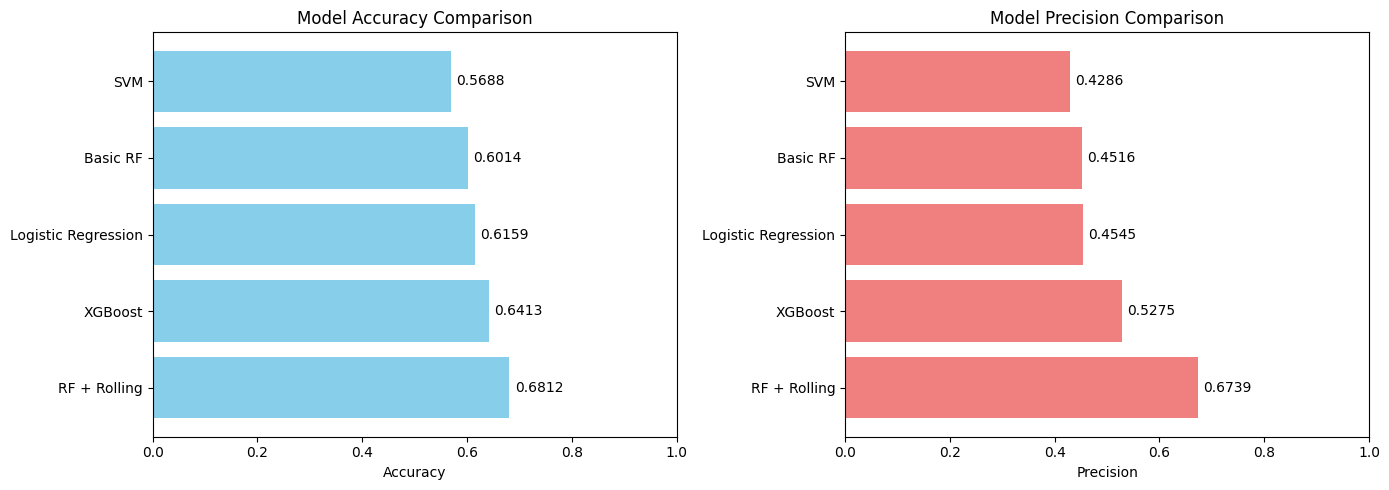

In [74]:
# Compare all models
results = pd.DataFrame({
    'Model': ['Basic RF', 'RF + Rolling', 'Logistic Regression', 'SVM', 'XGBoost'],
    'Accuracy': [acc_basic, acc_rolling, acc_lr, acc_svm, acc_xgb],
    'Precision': [prec_basic, prec_rolling, prec_lr, prec_svm, prec_xgb]
})

results = results.sort_values('Accuracy', ascending=False)

print("="*60)
print("MODEL COMPARISON")
print("="*60)
print(results.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
axes[0].barh(results['Model'], results['Accuracy'], color='skyblue')
axes[0].set_xlabel('Accuracy')
axes[0].set_title('Model Accuracy Comparison')
axes[0].set_xlim([0, 1])
for i, v in enumerate(results['Accuracy']):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center')

# Precision comparison
axes[1].barh(results['Model'], results['Precision'], color='lightcoral')
axes[1].set_xlabel('Precision')
axes[1].set_title('Model Precision Comparison')
axes[1].set_xlim([0, 1])
for i, v in enumerate(results['Precision']):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

# Feature Importance (XGBoost)

Feature Importance (Random Forest with Rolling Features):
          Feature  Importance
8    dist_rolling    0.168680
1             opp    0.146513
6      sh_rolling    0.144902
7     sot_rolling    0.120184
5      ga_rolling    0.087554
4      gf_rolling    0.087067
9      fk_rolling    0.061460
2            hour    0.061330
3             day    0.051049
11  pkatt_rolling    0.028693
0             h/a    0.023229
10     pk_rolling    0.019338


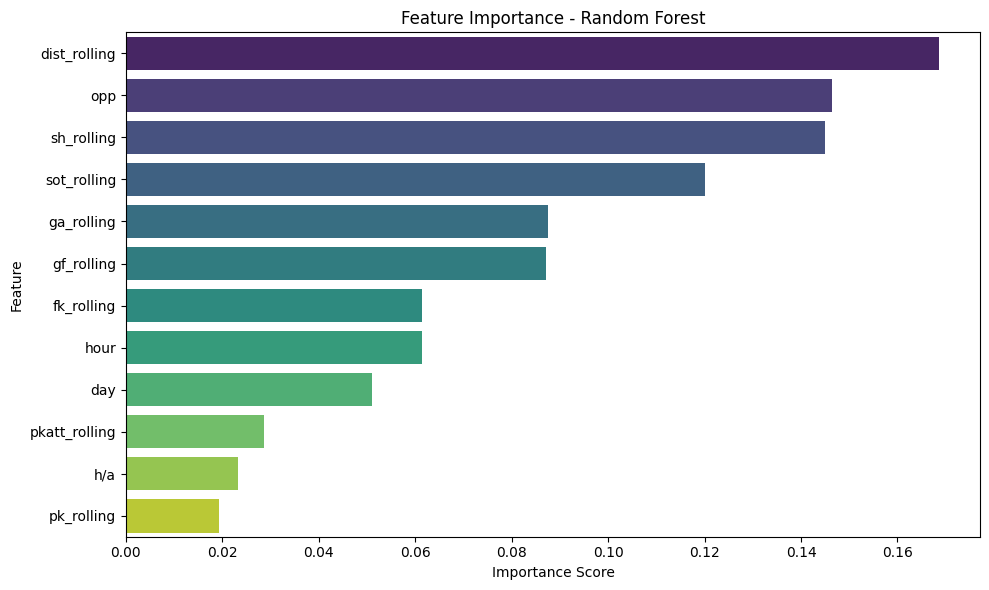

In [75]:
# Get feature importance from best Random Forest model
feature_importance = pd.DataFrame({
    'Feature': rolling_predictors,
    'Importance': rf_rolling.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Random Forest with Rolling Features):")
print(feature_importance)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Sample Predictions

In [76]:
# Show some example predictions with the best model
combined = pd.DataFrame({
    'actual': test["target"], 
    'prediction': preds_rolling
}, index=test.index)

combined = combined.merge(
    matches_rolling[["date", "team", "opponent", "result", "gf", "ga"]], 
    left_index=True, 
    right_index=True
)

print("Sample Predictions (Random Forest with Rolling Features):")
print("="*80)
print(combined.head(20))

# Show some incorrect predictions
print("\nIncorrect Predictions:")
print("="*80)
incorrect = combined[combined['actual'] != combined['prediction']]
print(incorrect.head(10))

Sample Predictions (Random Forest with Rolling Features):
     actual  prediction       date         team        opponent result   gf  \
55        0           1 2022-01-23      Arsenal         Burnley      D  0.0   
56        1           0 2022-02-10      Arsenal          Wolves      W  1.0   
57        1           0 2022-02-19      Arsenal       Brentford      W  2.0   
58        1           1 2022-02-24      Arsenal          Wolves      W  2.0   
59        1           1 2022-03-06      Arsenal         Watford      W  3.0   
60        1           1 2022-03-13      Arsenal  Leicester City      W  2.0   
61        0           0 2022-03-16      Arsenal       Liverpool      L  0.0   
62        1           0 2022-03-19      Arsenal     Aston Villa      W  1.0   
63        0           0 2022-04-04      Arsenal  Crystal Palace      L  0.0   
64        0           0 2022-04-09      Arsenal        Brighton      L  1.0   
65        0           0 2022-04-16      Arsenal     Southampton      L  0

# Saving Models

In [77]:
# Save all trained models for testing
import joblib
import os
from datetime import datetime

# Create models directory
models_dir = '../models'
os.makedirs(models_dir, exist_ok=True)

print("Saving trained models...")
print("="*60)

# 1. Save Basic Random Forest
joblib.dump(rf_basic, f'{models_dir}/rf_basic.pkl')
print(f"✅ Basic RF saved - Accuracy: {acc_basic:.4f}, Precision: {prec_basic:.4f}")

# 2. Save Random Forest with Rolling Features (BEST MODEL)
joblib.dump(rf_rolling, f'{models_dir}/rf_rolling.pkl')
print(f"✅ RF + Rolling saved - Accuracy: {acc_rolling:.4f}, Precision: {prec_rolling:.4f}")

# 3. Save Logistic Regression
joblib.dump(lr, f'{models_dir}/logistic_regression.pkl')
print(f"✅ Logistic Regression saved - Accuracy: {acc_lr:.4f}, Precision: {prec_lr:.4f}")

# 4. Save SVM
joblib.dump(svm, f'{models_dir}/svm.pkl')
print(f"✅ SVM saved - Accuracy: {acc_svm:.4f}, Precision: {prec_svm:.4f}")

# 5. Save XGBoost
joblib.dump(xgb, f'{models_dir}/xgboost.pkl')
print(f"✅ XGBoost saved - Accuracy: {acc_xgb:.4f}, Precision: {prec_xgb:.4f}")

# Save predictors and data
joblib.dump(basic_predictors, f'{models_dir}/basic_predictors.pkl')
joblib.dump(rolling_predictors, f'{models_dir}/rolling_predictors.pkl')
joblib.dump(test, f'{models_dir}/test_data.pkl')
joblib.dump(matches_rolling, f'{models_dir}/matches_rolling.pkl')

# Save all metrics in one file
all_metrics = {
    'basic_rf': {'accuracy': acc_basic, 'precision': prec_basic},
    'rf_rolling': {'accuracy': acc_rolling, 'precision': prec_rolling},
    'logistic_regression': {'accuracy': acc_lr, 'precision': prec_lr},
    'svm': {'accuracy': acc_svm, 'precision': prec_svm},
    'xgboost': {'accuracy': acc_xgb, 'precision': prec_xgb},
    'saved_at': datetime.now().isoformat()
}
joblib.dump(all_metrics, f'{models_dir}/all_metrics.pkl')

print("="*60)
print(f"✅ All models saved to: {models_dir}")
print(f"\nBest Model: RF + Rolling Features")
print(f"  - Test Accuracy: {acc_rolling:.4f} ({acc_rolling*100:.2f}%)")
print(f"  - Test Precision: {prec_rolling:.4f} ({prec_rolling*100:.2f}%)")

Saving trained models...
✅ Basic RF saved - Accuracy: 0.6014, Precision: 0.4516
✅ RF + Rolling saved - Accuracy: 0.6812, Precision: 0.6739
✅ Logistic Regression saved - Accuracy: 0.6159, Precision: 0.4545
✅ SVM saved - Accuracy: 0.5688, Precision: 0.4286
✅ XGBoost saved - Accuracy: 0.6413, Precision: 0.5275
✅ All models saved to: ../models

Best Model: RF + Rolling Features
  - Test Accuracy: 0.6812 (68.12%)
  - Test Precision: 0.6739 (67.39%)
